In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.gridspec as gsp
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))  
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
#Computing mean and std  accross different simulations-Storing them in a dictionary named MAPE and STDMAPE
MAPE_aux= {}
STDMAPE_aux={}
for st in ['Mean','Var']:
    for b in ['8','16']:
        for i in ['1','2','3','4']:
            for meth in ['MOM','MLE']:
                p1='Diversity_1000_Fmax_10^6_BINS'
                p2='ratio_1e6_lognormal'
                MAPE_aux["{St}_{Meth}_{B}_{I}".format(St=st,Meth=meth,B=b,I=i) ]=100*np.mean(np.load('{St}_sur_{Meth}_{P1}_{B}_{P2}_{I}.npy'.format(St=st,Meth=meth,B=b,I=i,P1=p1,P2=p2)),axis=0)
                STDMAPE_aux["{St}_{Meth}_{B}_{I}".format(St=st,Meth=meth,B=b,I=i) ]=100*np.std(np.load('{St}_sur_{Meth}_{P1}_{B}_{P2}_{I}.npy'.format(St=st,Meth=meth,B=b,I=i,P1=p1,P2=p2)),axis=0)
                
                
                
#Concatenate
MAPE= {}
STDMAPE={}
for st in ['Mean','Var']:
    for b in ['8','16']:
        for meth in ['MOM','MLE']:
            MAPE["{St}_{Meth}_{B}".format(St=st,Meth=meth,B=b)]=np.block([
    [MAPE_aux["{St}_{Meth}_{B}_1".format(St=st,Meth=meth,B=b) ],MAPE_aux["{St}_{Meth}_{B}_2".format(St=st,Meth=meth,B=b) ]],
    [MAPE_aux["{St}_{Meth}_{B}_3".format(St=st,Meth=meth,B=b) ], MAPE_aux["{St}_{Meth}_{B}_4".format(St=st,Meth=meth,B=b) ]    ]
])
            STDMAPE["{St}_{Meth}_{B}".format(St=st,Meth=meth,B=b)]=np.block([
    [STDMAPE_aux["{St}_{Meth}_{B}_1".format(St=st,Meth=meth,B=b) ],STDMAPE_aux["{St}_{Meth}_{B}_2".format(St=st,Meth=meth,B=b) ]],
    [STDMAPE_aux["{St}_{Meth}_{B}_3".format(St=st,Meth=meth,B=b) ], STDMAPE_aux["{St}_{Meth}_{B}_4".format(St=st,Meth=meth,B=b) ]    ]
])

In [3]:
MAPE['Mean_MLE_8'][10,:]

array([35.48524285, 27.56531633, 23.73781952, 21.42118212, 19.28819527,
       16.70916924, 14.04922494, 11.53106759, 10.09240188,  8.42075687,
        7.72120672,  6.97897516,  5.59966761,  5.13336549,  4.80487455,
        3.95248749,  3.71800617,  3.65711397])

In [4]:
STDMAPE['Mean_MLE_8'][17,:]

array([0.96225264, 0.24017856, 0.61681924, 0.55806221, 0.60060217,
       0.35097275, 0.45186587, 0.31516385, 0.14463361, 0.16156207,
       0.19618335, 0.15266483, 0.06542018, 0.03068912, 0.0652345 ,
       0.03197699, 0.00448463, 0.01042538])

In [5]:
def Cost_16(D,Capacity=5e6, Price=500):
    """
    Takes as input the number of genetic design and return the price for the sequencing step and average number of reads per construct
    To be better than ML inference with 16 bins, you need at least 500 sequencing reads and 200 cells sorted per different genetic design.
    
    D: Int
        Number of genetic designs
        
    Capacity:Int
        average number of reads in one sequencing lane. Default number is 5e6 
    
    Price: Int
        price for one sequecing lane. Default number is $500
    
    """
    #how many sequencing lanes do we need?
    n_lanes=np.ceil((500*D)/(16*Capacity))
    n_lanes=n_lanes*16
    #how many reads per construct do we have on average then?
    n_reads=np.floor(n_lanes*Capacity/D)
    return(n_lanes*Price,n_reads)

def Cost_8(D,Capacity=5e6, Price=500):
    """
    Takes as input the number of genetic design and return the price for the sequencing step and average number of reads per construct
    To be better than ML inference with 8 bins, you need at least 100 sequencing reads and 50 cells sorted per different genetic design.
    
    D: Int
        Number of genetic designs
        
    Capacity:Int
        average number of reads in one sequencing lane. Default number is 5e6 
    
    Price: Int
        price for one sequecing lane. Default number is $500
    
    """
    #how many sequencing lanes do we need?
    n_lanes=np.ceil((100*D)/(8*Capacity))
    n_lanes=n_lanes*8
    #how many reads per construct do we have on average then?
    n_reads=np.floor(n_lanes*Capacity/D)
    return(n_lanes*Price,n_reads)

In [6]:
Cost_8(100)

(4000.0, 400000.0)

In [24]:
Reads_range=[5,10,15,20,25,35,50,75,100,150,200,250,500,750,1000,5000,10000,100000]

In [27]:
Reads_range=[5,10,15,20,25,35,50,75,100,150,200,250,500,750,1000,5000,10000,100000]

import sklearn
from sklearn.linear_model import LinearRegression
x=(np.log([5,10,15,20,25,35,50,75,100,150,200,250,500,750,1000,5000,10000,100000])).reshape(-1, 1)
y1=np.log(MAPE['Mean_MLE_8'][17,:])
y2=np.log(MAPE['Mean_MLE_8'][17,:])
reg8 = LinearRegression().fit(x, y1)
reg16 = LinearRegression().fit(x, y2)



def Precision_8(D,Normalised_cells=10):
    myNumber=Cost_8(D)[1]
    MAP=reg8.predict(np.log([myNumber]).reshape(-1, 1))
    return(np.exp(MAP))

def Precision_16(D,Normalised_cells=10):
    myNumber=Cost_16(D)[1]
    MAP=reg16.predict(np.log([myNumber]).reshape(-1, 1))
    return(np.exp(MAP))

In [25]:
# def Precision_8(D,Normalised_cells=10):
#     myNumber=Cost_8(D)[1]
#     INDEX=[]
#     for j in myNumber:
#         INDEX.append(min(range(len(Reads_range)), key=lambda x:abs(Reads_range[x]-j)))
#     return(MAPE['Mean_MLE_8'][Normalised_cells,INDEX])

# def Precision_16(D,Normalised_cells=10):
#     myNumber=Cost_16(D)[1]
#     INDEX=[]
#     for j in myNumber:
#         INDEX.append(min(range(len(Reads_range)), key=lambda x:abs(Reads_range[x]-j)))
#     return(MAPE['Mean_MLE_16'][Normalised_cells,INDEX])

# def Precision_16(D,Normalised_cells=10):
#     myNumber=Cost_16(D)[1]
#     myIndex=min(range(len(Reads_range)), key=lambda x:abs(Reads_range[x]-myNumber))
#     return(MAPE['Mean_MLE_16'][Normalised_cells,myIndex])

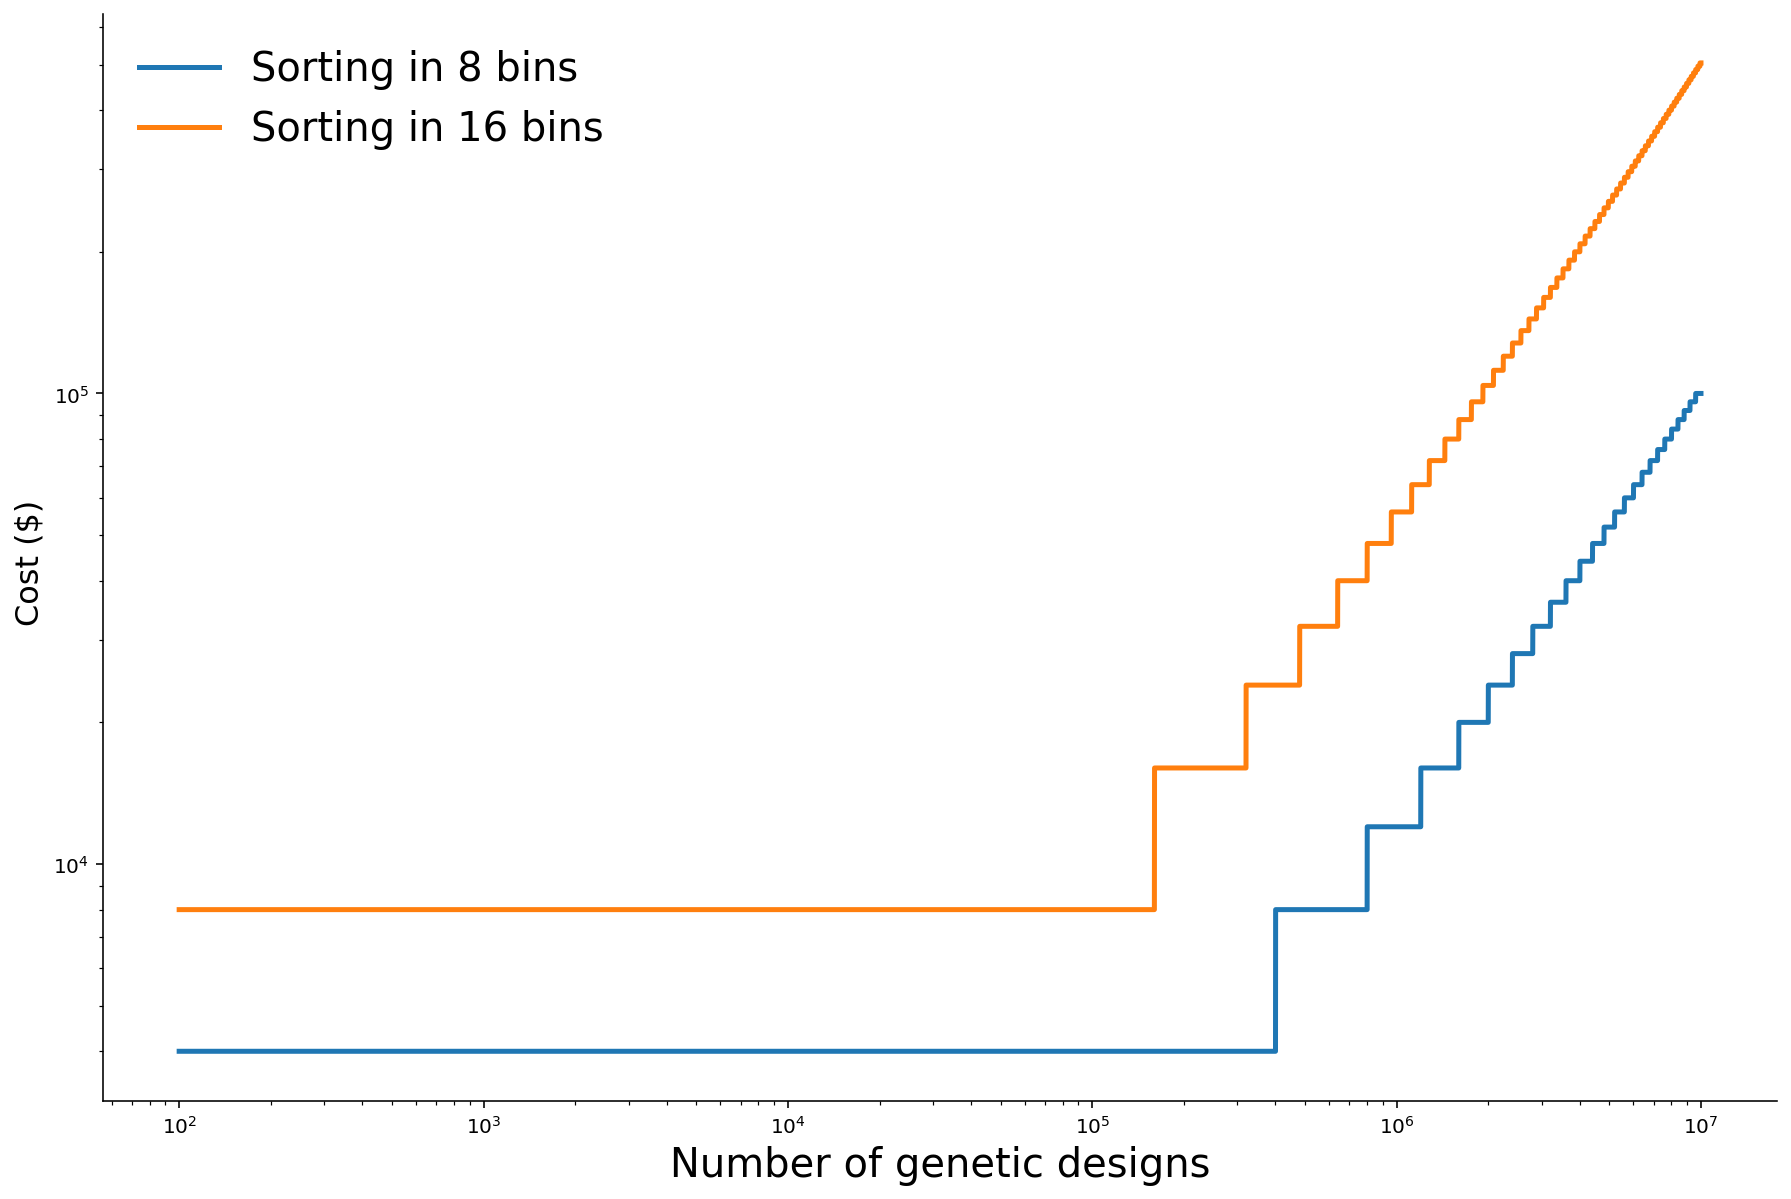

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
D=np.linspace(1e2,int(1e7),int(1e5))
plt.plot(D,Cost_8(D)[0],linewidth=2.5,label='Sorting in 8 bins')
plt.plot(D,Cost_16(D)[0],linewidth=2.5,label='Sorting in 16 bins')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Cost ($) ',fontsize=16)
sns.despine()
plt.xlabel('Number of genetic designs',fontsize=20)
#plt.text(0.17, 1e4, r'$\langle \frac{\sigma_{MOM}-\sigma_{ML}}{\sigma_{ML}} \rangle \sim $%s'%approx_bias, fontsize=26)
#plt.savefig(‘Cambray_comparison_Ml_mom_4_experiments_merged_logfluorescence_data_distribution_upward_bias_variance.png',transparent=True,bbox_inches='tight',dpi=600)
plt.legend(frameon=False ,fontsize=20,markerscale=3)
# plt.ticklabel_format(axis="x",style="sci", scilimits=(0,0))
# plt.ticklabel_format( axis='y',style="sci", scilimits=(0,0))

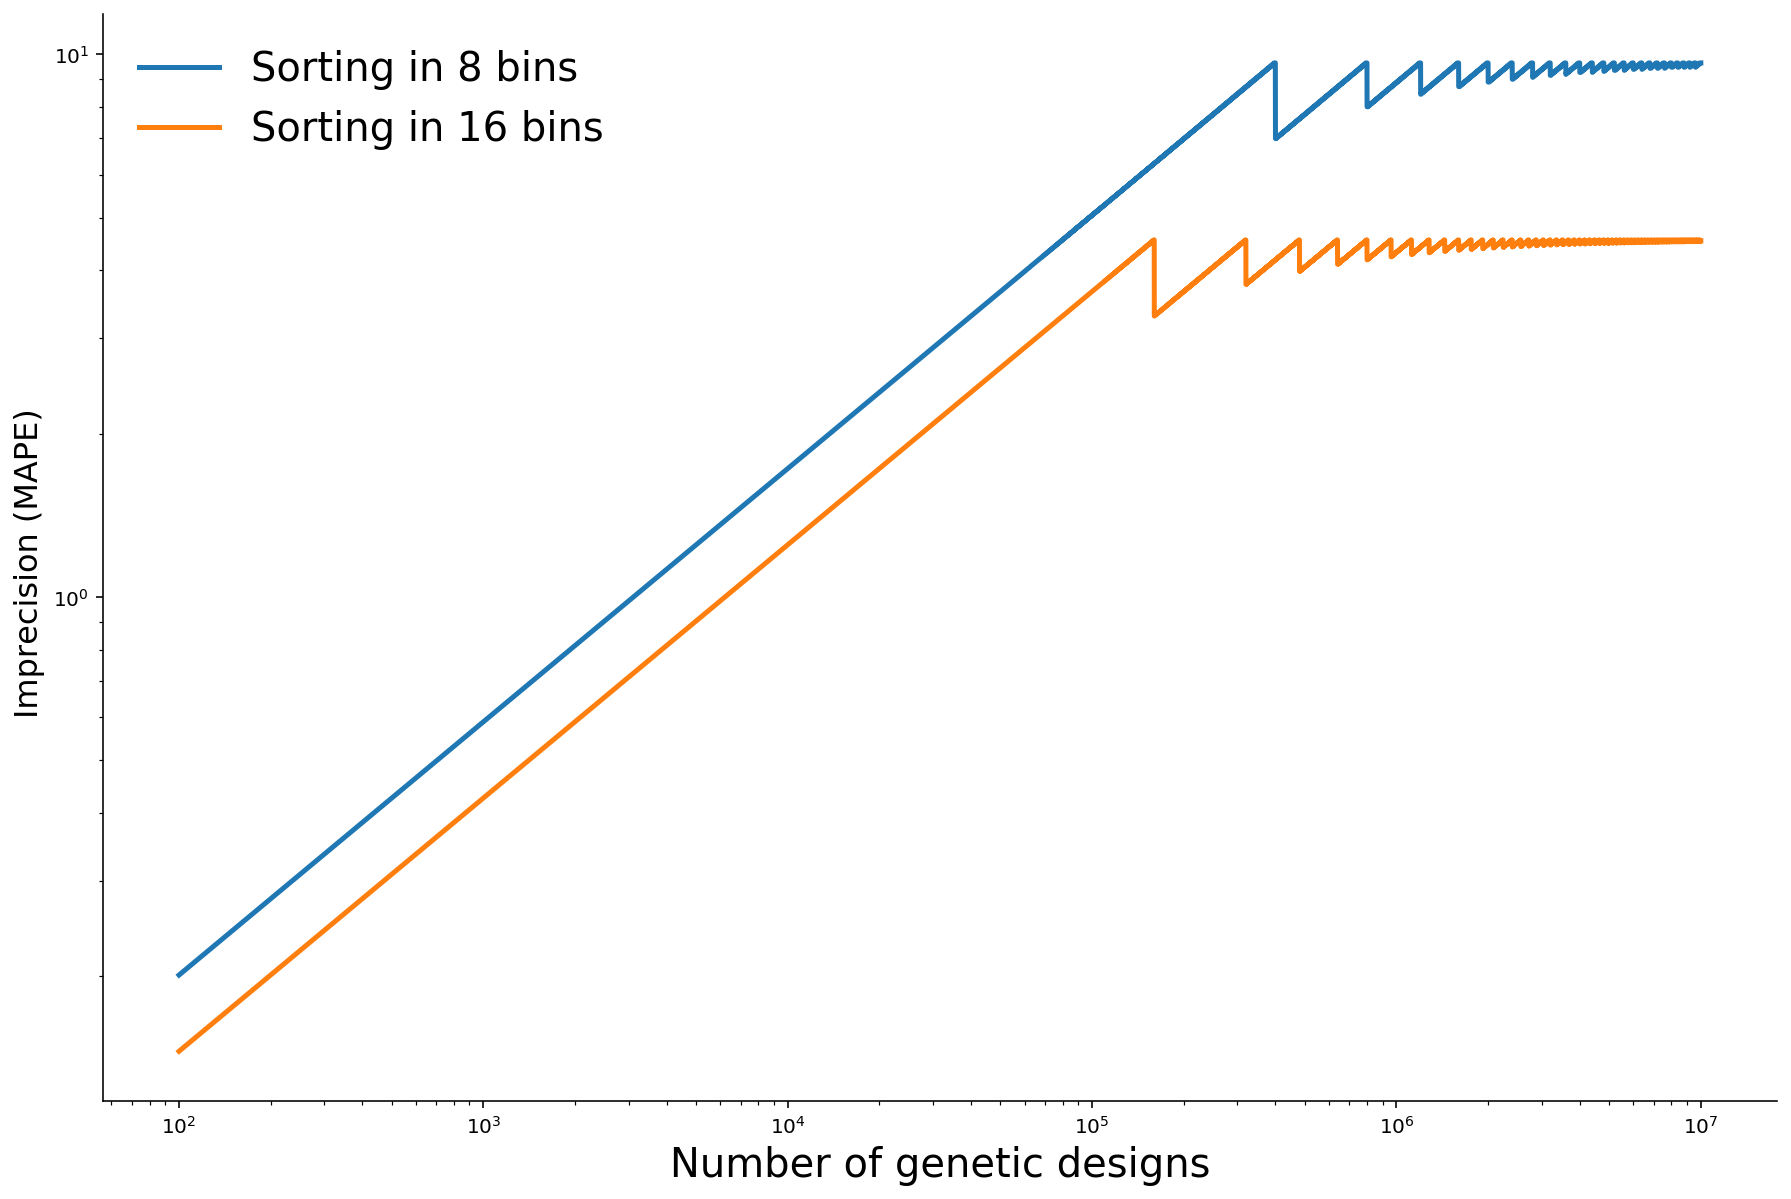

In [191]:
fig, ax = ax[1].subplots(figsize=(15, 10))
D=np.linspace(1e2,int(1e7),int(1e5))
ax[1].plot(D,Precision_8(D),linewidth=2.5,label='Sorting in 8 bins')
ax[1].plot(D,Precision_16(D),linewidth=2.5,label='Sorting in 16 bins')
ax[1].yscale('log')
ax[1].xscale('log')
ax[1].ylabel('Imprecision (MAPE) ',fontsize=16)
sns.despine()
ax[1].xlabel('Number of genetic designs',fontsize=20)
#ax[1].text(0.17, 1e4, r'$\langle \frac{\sigma_{MOM}-\sigma_{ML}}{\sigma_{ML}} \rangle \sim $%s'%approx_bias, fontsize=26)
#ax[1].savefig(‘Cambray_comparison_Ml_mom_4_experiments_merged_logfluorescence_data_distribution_upward_bias_variance.png',transparent=True,bbox_inches='tight',dpi=600)
ax[1].legend(frameon=False ,fontsize=20,markerscale=3)
# ax[1].ticklabel_format(axis="x",style="sci", scilimits=(0,0))
# ax[1].ticklabel_format( axis='y',style="sci", scilimits=(0,0))

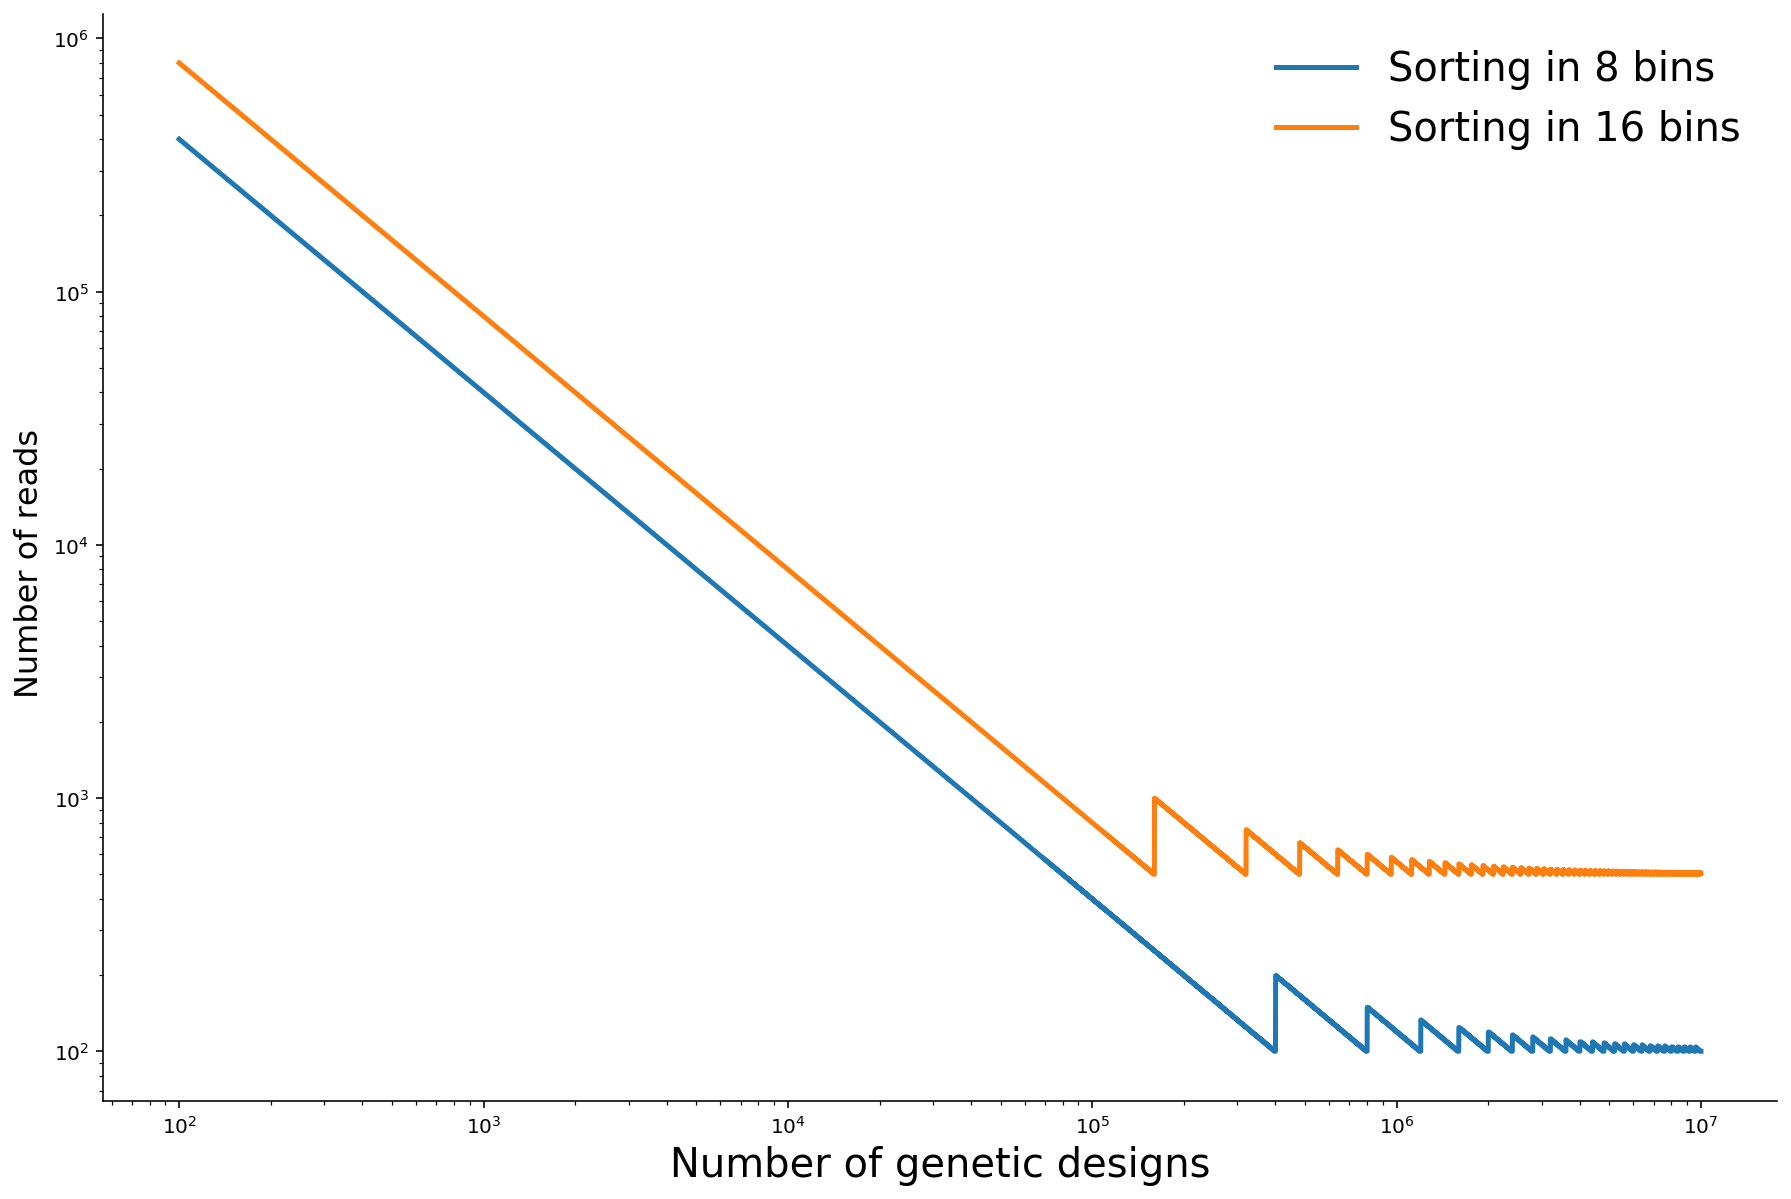

In [162]:
fig, ax = plt.subplots(figsize=(15, 10))
D=np.linspace(1e2,int(1e7),int(1e5))
plt.plot(D,Cost_8(D)[1],linewidth=2.5,label='Sorting in 8 bins')
plt.plot(D,Cost_16(D)[1],linewidth=2.5,label='Sorting in 16 bins')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Number of reads ',fontsize=16)
sns.despine()
plt.xlabel('Number of genetic designs',fontsize=20)
#plt.text(0.17, 1e4, r'$\langle \frac{\sigma_{MOM}-\sigma_{ML}}{\sigma_{ML}} \rangle \sim $%s'%approx_bias, fontsize=26)
#plt.savefig(‘Cambray_comparison_Ml_mom_4_experiments_merged_logfluorescence_data_distribution_upward_bias_variance.png',transparent=True,bbox_inches='tight',dpi=600)
plt.legend(frameon=False ,fontsize=20,markerscale=3)
# plt.ticklabel_format(axis="x",style="sci", scilimits=(0,0))
# plt.ticklabel_format( axis='y',style="sci", scilimits=(0,0))

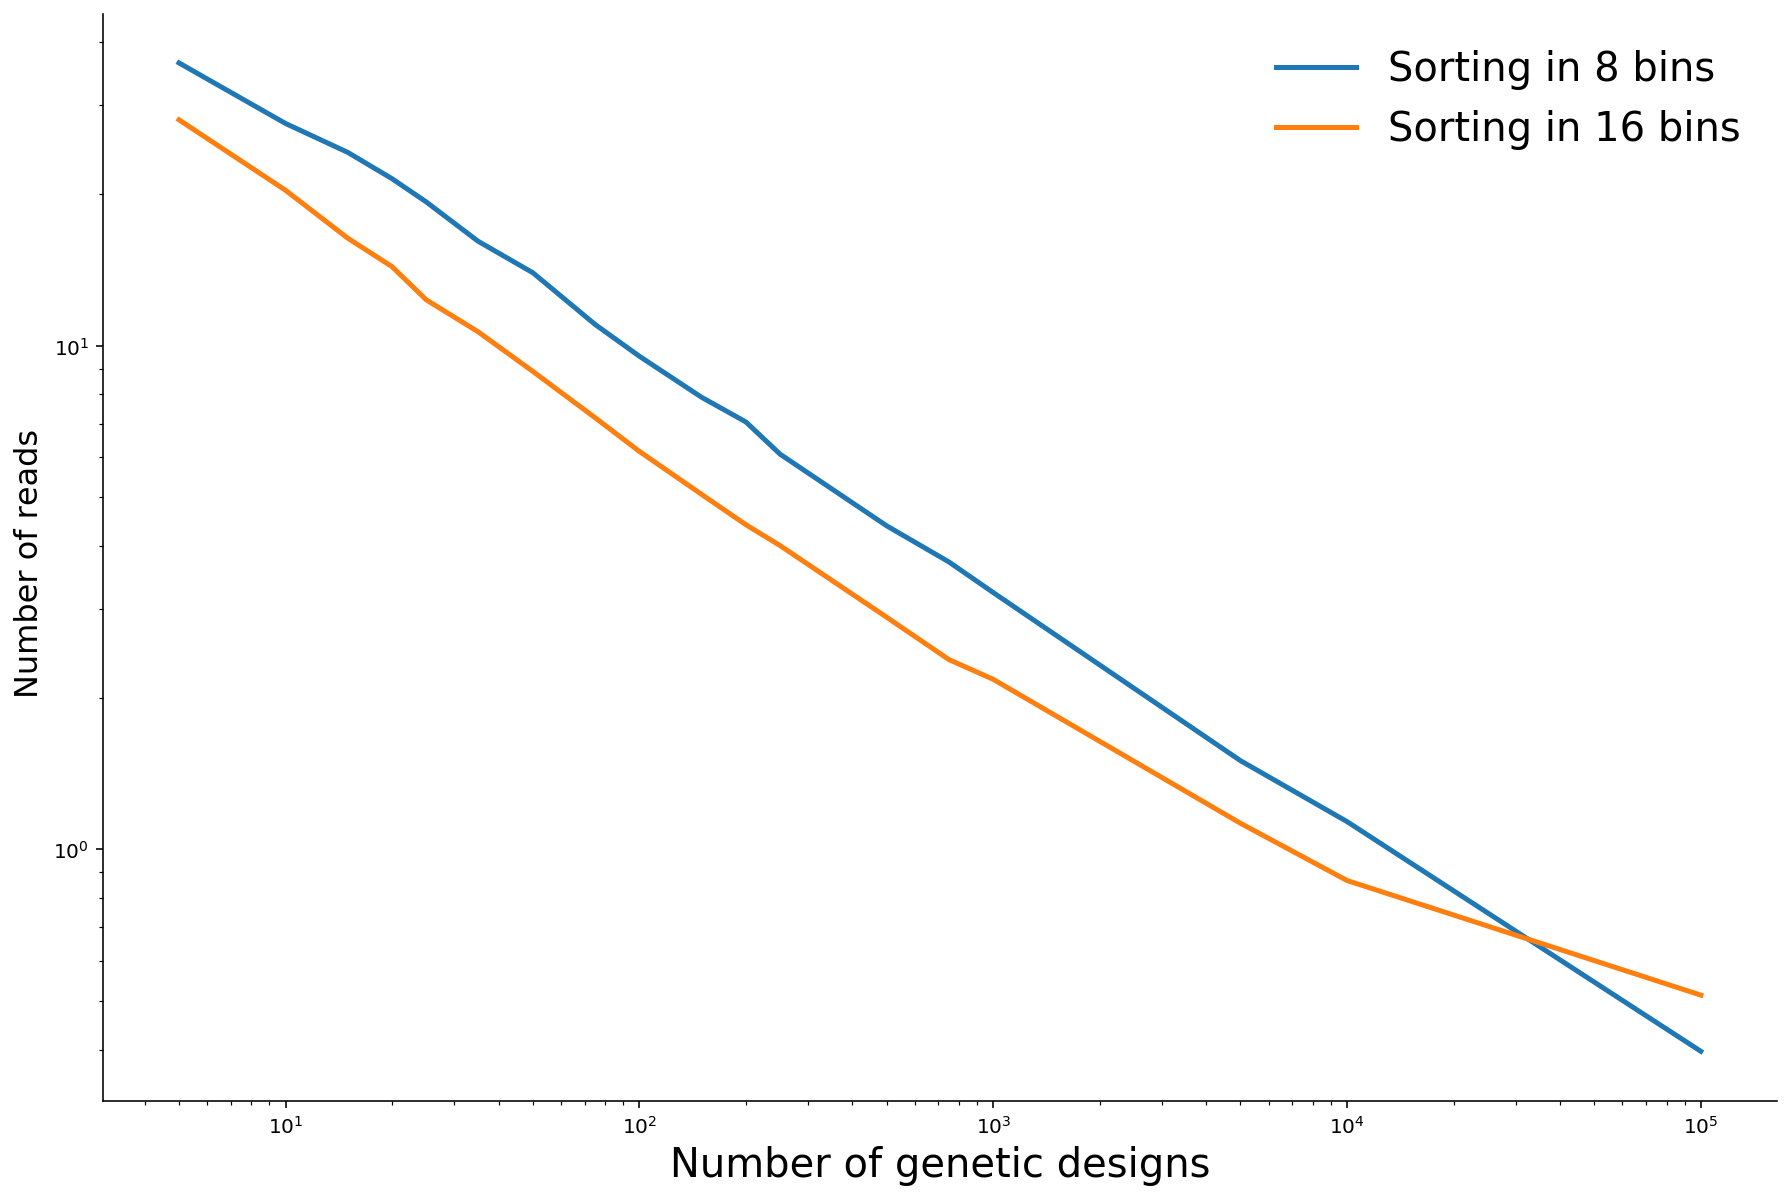

In [170]:
fig, ax = plt.subplots(figsize=(15, 10))
D=[5,10,15,20,25,35,50,75,100,150,200,250,500,750,1000,5000,10000,100000]
plt.plot(D,MAPE['Mean_MLE_8'][17,np.arange(18)],linewidth=2.5,label='Sorting in 8 bins')
plt.plot(D,MAPE['Mean_MLE_16'][17,np.arange(18)],linewidth=2.5,label='Sorting in 16 bins')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Number of reads ',fontsize=16)
sns.despine()
plt.xlabel('Number of genetic designs',fontsize=20)
#plt.text(0.17, 1e4, r'$\langle \frac{\sigma_{MOM}-\sigma_{ML}}{\sigma_{ML}} \rangle \sim $%s'%approx_bias, fontsize=26)
#plt.savefig(‘Cambray_comparison_Ml_mom_4_experiments_merged_logfluorescence_data_distribution_upward_bias_variance.png',transparent=True,bbox_inches='tight',dpi=600)
plt.legend(frameon=False ,fontsize=20,markerscale=3)

In [174]:
np.log(MAPE['Mean_MLE_8'][17,:])

array([ 3.59405421,  3.31736798,  3.18507336,  3.06490046,  2.95850518,
        2.77924432,  2.63516057,  2.39868823,  2.25365424,  2.06580291,
        1.95334665,  1.8058525 ,  1.47858888,  1.31334254,  1.17372214,
        0.40519784,  0.12684378, -0.92291111])

In [188]:
reg16.predict(np.log(Cost_16(np.array([10,100]))[1]).reshape(-1, 1))

array([-3.00258393, -1.92804713])

In [153]:
Cost_8(1e3)

(4000.0, 40000.0)

In [167]:
np.arange(18)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [145]:
MAPE['Mean_MLE_8'][10,[5,5]]

array([16.70916924, 16.70916924])

In [ ]:
#Plot Cost as a function of library design, given that the sequencing step is the most expensive.